In [4]:
import polars as pl
import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# articles = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/articles.parquet')

In [5]:
articles = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/articles.parquet')
#articles_test = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_testset/articles.parquet')

behaviors_train = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/train/behaviors.parquet')
history_train = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/train/history.parquet')

behaviors_val = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/validation/behaviors.parquet')
#history_val = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/validation/history.parquet')

behaviors_test = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_testset/test/behaviors.parquet')
#history_test = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_testset/test/history.parquet')

# contrastive_vectors = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/Ekstra_Bladet_contrastive_vector/contrastive_vector.parquet')
# image_embeddings = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/Ekstra_Bladet_image_embeddings/image_embeddings.parquet')
# document_vectors = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/Ekstra_Bladet_word2vec/document_vector.parquet')
# roberta_embeddings = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/FacebookAI_xlm_roberta_base/xlm_roberta_base.parquet')
# bert_embeddings = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/google_bert_base_multilingual_cased/bert_base_multilingual_cased.parquet')

In [15]:
articles

article_id,title,subtitle,last_modified_time,premium,body,published_time,image_ids,article_type,url,ner_clusters,entity_groups,topics,category,subcategory,category_str,total_inviews,total_pageviews,total_read_time,sentiment_score,sentiment_label
i32,str,str,datetime[μs],bool,str,datetime[μs],list[i64],str,str,list[str],list[str],list[str],i16,list[i16],str,i32,i32,f32,f32,str
3000022,"""Hanks beskyldt…","""Tom Hanks har …",2023-06-29 06:20:32,false,"""Tom Hanks skul…",2006-09-20 09:24:18,[3518381],"""article_defaul…","""https://ekstra…","[""David Gardner""]","[""PER""]","[""Kriminalitet"", ""Kendt"", … ""Litteratur""]",414,[432],"""underholdning""",null,null,null,0.9911,"""Negative"""
3000063,"""Bostrups aske …","""Studieværten b…",2023-06-29 06:20:32,false,"""Strålende sens…",2006-09-24 07:45:30,"[3170935, 3170939]","""article_defaul…","""https://ekstra…",[],[],"[""Kendt"", ""Underholdning"", … ""Personlig begivenhed""]",118,[133],"""nyheder""",null,null,null,0.5155,"""Neutral"""
3000613,"""Jesper Olsen r…","""Den tidligere …",2023-06-29 06:20:33,false,"""Jesper Olsen, …",2006-05-09 11:29:00,[3164998],"""article_defaul…","""https://ekstra…","[""Frankrig"", ""Jesper Olsen"", … ""Jesper Olsen""]","[""LOC"", ""PER"", … ""PER""]","[""Kendt"", ""Sport"", … ""Sygdom og behandling""]",142,"[196, 271]","""sport""",null,null,null,0.9876,"""Negative"""
3000700,"""Madonna topløs…","""47-årige Madon…",2023-06-29 06:20:33,false,"""Skal du have s…",2006-05-04 11:03:12,[3172046],"""article_defaul…","""https://ekstra…",[],[],"[""Kendt"", ""Livsstil"", ""Underholdning""]",414,[432],"""underholdning""",null,null,null,0.8786,"""Neutral"""
3000840,"""Otto Brandenbu…","""Sangeren og sk…",2023-06-29 06:20:33,false,"""'Og lidt for S…",2007-03-01 18:34:00,[3914446],"""article_defaul…","""https://ekstra…",[],[],"[""Kendt"", ""Underholdning"", … ""Musik og lyd""]",118,[133],"""nyheder""",null,null,null,0.9468,"""Negative"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9803505,"""Flyvende Anton…","""Verdens nummer…",2023-06-29 06:49:26,false,"""Anders Antonse…",2023-06-08 05:54:06,[9803516],"""article_defaul…","""https://ekstra…","[""Alexandra Bøje"", ""All England"", … ""Taiwan""]","[""PER"", ""PROD"", … ""LOC""]","[""Kendt"", ""Begivenhed"", … ""Sportsbegivenhed""]",142,"[327, 330]","""sport""",13320,959,55691.0,0.8884,"""Positive"""
9803510,"""Nedschroef Lan…","""Hos Nedschroef…",2023-06-29 06:49:26,false,"""Et udbytte på …",2023-06-08 05:48:51,[9803509],"""article_defaul…","""https://ekstra…","[""Bytoften"", ""Erhvervsstyrelsen"", … ""Plettenberg Gmbh""]","[""LOC"", ""ORG"", … ""PER""]","[""Erhverv"", ""Privat virksomhed"", ""Økonomi""]",2889,"[2890, 2900]","""auto""",12,1,25.0,0.8723,"""Negative"""
9803525,"""Dansk skuespil…","""Julie R. Ølgaa…",2023-06-29 06:49:26,false,"""Mens hun lå sø…",2023-06-08 06:45:46,"[9803518, 9803519, … 9803524]","""article_defaul…","""https://ekstra…","[""Cooper"", ""Englemageren"", … ""Svangerskabsforgiftning""]","[""PER"", ""PROD"", … ""MISC""]","[""Kendt"", ""Livsstil"", … ""Sygdom og behandling""]",414,[425],"""underholdning""",315391,50361,2.550671e6,0.7737,"""Negative"""


# Articles Tot Views

In [59]:
history = history_train.select('article_id_fixed').explode('article_id_fixed').group_by('article_id_fixed').count().rename({'article_id_fixed':'article_id'})
behaviors = behaviors_train.select('article_ids_clicked').group_by('article_ids_clicked').count().rename({'article_ids_clicked':'article_id', 'count': 'bh_count'})
articles = articles.select(['article_id','total_pageviews']).join(history,on='article_id')
behaviors = behaviors.explode('article_id') 
articles.join(behaviors, on='article_id').with_colum


/tmp/ipykernel_221/2782552980.py:1: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  history = history_train.select('article_id_fixed').explode('article_id_fixed').group_by('article_id_fixed').count().rename({'article_id_fixed':'article_id'})
/tmp/ipykernel_221/2782552980.py:2: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  behaviors = behaviors_train.select('article_ids_clicked').group_by('article_ids_clicked').count().rename({'article_ids_clicked':'article_id', 'count': 'bh_count'})


article_id,total_pageviews,count,bh_count
i32,i32,u32,u32
8122724,null,1,7
9538375,null,14,1
9517146,null,3,3
9701446,55616,9,126
9760087,29546,397,1
…,…,…,…
9768260,145766,2225,5
9747962,45411,594,7
9747962,45411,594,7


In [ ]:
del history
del behaviors
del articles

# Inview analysis

525

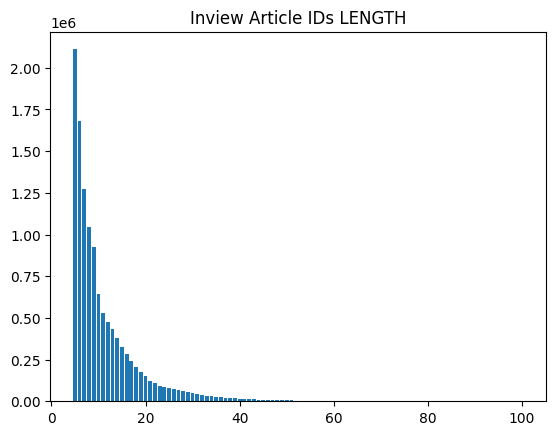

In [17]:
shown_articles = behaviors_train.with_columns(ln = pl.col("article_ids_inview").list.len()).select('ln').group_by('ln').len().sort(by='ln')
shown_articles_x = shown_articles['ln'].to_numpy()
shown_articles_y = shown_articles['len'].to_numpy()
plt.bar(shown_articles_x,shown_articles_y)
plt.title('Inview Article IDs LENGTH')

del shown_articles
del shown_articles_x
del shown_articles_y
gc.collect()

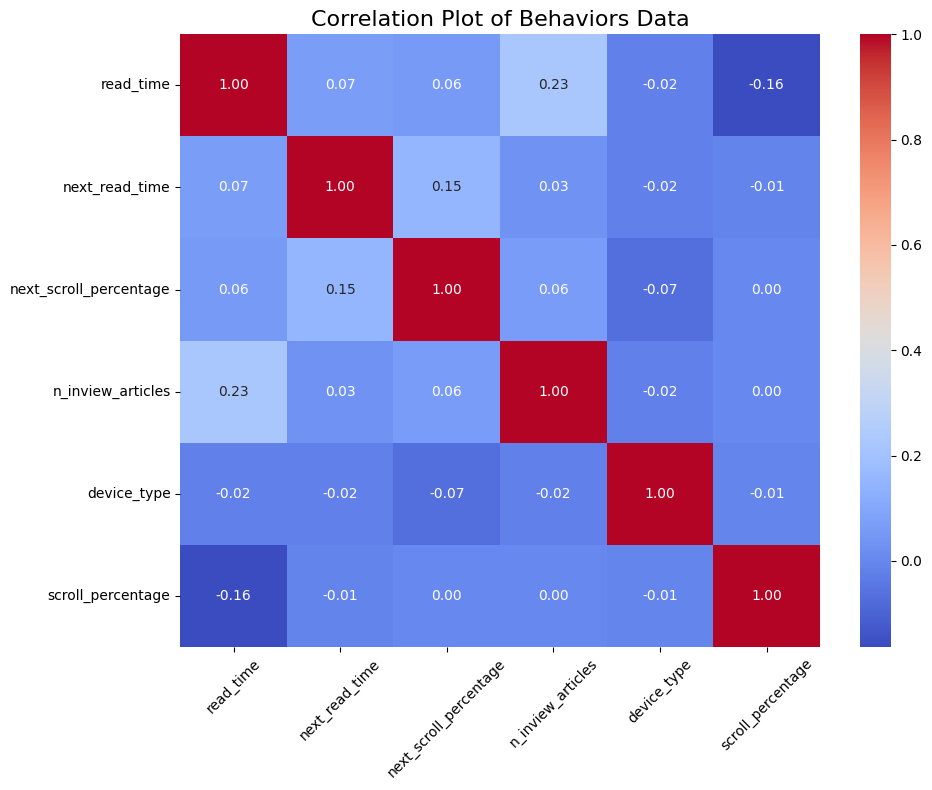

<function gc.collect(generation=2)>

In [18]:
behaviors_corr = behaviors_train.with_columns(n_inview_articles = pl.col("article_ids_inview").list.len()).select(['read_time','next_read_time','next_scroll_percentage','n_inview_articles','device_type','scroll_percentage']).drop_nulls()
plt.figure(figsize=(10, 8))
sns.heatmap(behaviors_corr.corr(), annot=True, cmap='coolwarm',xticklabels=behaviors_corr.columns, yticklabels=behaviors_corr.columns, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Plot of Behaviors Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

del behaviors_corr
gc.collect

# Analysis on Behavior path

In [19]:
del behaviors_train
gc.collect()
behaviors_train = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_small/train/behaviors.parquet')

In [20]:
tab_1 = behaviors_train.select(['article_id', 'user_id','impression_time','article_ids_clicked','read_time','next_read_time','session_id']).explode('article_ids_clicked').rename({'article_ids_clicked':'join_id'}).drop_nulls('join_id').sort('user_id') #.limit(100000)
tab_2 = behaviors_train.select(['article_id', 'user_id','impression_time','read_time','session_id']).rename({'article_id':'join_id'}).drop_nulls('join_id').sort('user_id') #.limit(100000)

In [21]:
connections = tab_1.join(tab_2, on='join_id').filter((pl.col('user_id')==pl.col('user_id_right')) & (pl.col('article_id').is_not_null()) & (pl.col('session_id') == pl.col('session_id_right'))).with_columns((pl.col('impression_time_right') - pl.col('impression_time')).alias('diff_time'))
connections
print(connections.shape)
col_name = connections.columns

(1586, 12)


In [25]:
v_connections = connections.map_rows(lambda t: (t[0], t[1], t[2], t[3], t[4], t[5], t[6], t[7],t[8],t[9],t[10],t[11].total_seconds()))
v_connections.columns = col_name
v_connections = v_connections.filter(pl.col('read_time') == pl.col('diff_time')).filter(pl.col('next_read_time') == pl.col('read_time_right'))
print(v_connections.shape)
v_connections

(570, 12)


article_id,user_id,impression_time,join_id,read_time,next_read_time,session_id,user_id_right,impression_time_right,read_time_right,session_id_right,diff_time
i64,i64,datetime[μs],i64,f64,f64,i64,i64,datetime[μs],f64,i64,f64
9779263,35673,2023-05-25 19:15:45,9780372,237.0,155.0,191727,35673,2023-05-25 19:19:42,155.0,191727,237.0
9782092,48960,2023-05-27 07:35:13,9782722,42.0,31.0,172590,48960,2023-05-27 07:35:55,31.0,172590,42.0
9782919,48960,2023-05-27 07:31:41,9783278,21.0,139.0,172590,48960,2023-05-27 07:32:02,139.0,172590,21.0
9780195,48960,2023-05-25 10:56:38,9779205,70.0,116.0,172587,48960,2023-05-25 10:57:48,116.0,172587,70.0
9779205,48960,2023-05-25 10:57:48,9779737,116.0,51.0,172587,48960,2023-05-25 10:59:44,51.0,172587,116.0
…,…,…,…,…,…,…,…,…,…,…,…
9789600,2561387,2023-05-31 17:05:42,9789810,67.0,73.0,124370,2561387,2023-05-31 17:06:49,73.0,124370,67.0
9787784,2564089,2023-05-30 09:13:35,9787960,131.0,44.0,215165,2564089,2023-05-30 09:15:46,44.0,215165,131.0
9787960,2564089,2023-05-30 09:15:46,9787855,44.0,24.0,215165,2564089,2023-05-30 09:16:30,24.0,215165,44.0


In [26]:
np.average(v_connections.group_by('user_id').len().select('len').to_numpy())
del tab_1
del tab_2
del connections
del v_connections
gc.collect()

1116

# Users in Behavior and History

In [31]:
del behaviors_val
del history_train
gc.collect()
behaviors_train = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/train/behaviors.parquet')
history_train = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_small/train/behaviors.parquet')

In [32]:
print("Users in History")
print(history_train.select("user_id").n_unique())
print("Users in Behaviors")
print(behaviors_test.select("user_id").n_unique())

Users in History
15143
Users in Behaviors
807677


In [33]:
history_t = history_train.select("user_id")
behaviors_t = behaviors_test.select(["user_id", "is_sso_user","is_subscriber"])


print("Users in behaviors")
print(behaviors_t.select("user_id").n_unique())
print("Users in history")
print(history_t.select("user_id").n_unique())


print("Users in behaviors and history")
behaviors_test_h = behaviors_t.filter(pl.col('user_id').is_in(history_t['user_id']))
print(behaviors_test_h.select('user_id').n_unique())
print("Logged or subscribed")
print(behaviors_test_h.filter((pl.col('is_sso_user') == True) | (pl.col('is_subscriber') == True)).select("user_id").n_unique())
print("Not logged and subscribed")
print(behaviors_test_h.filter((pl.col('is_sso_user') == False) & (pl.col('is_subscriber') == False)).select("user_id").n_unique())


print("Users in behaviour and not in history")
behaviors_test_nh = behaviors_t.filter(~pl.col('user_id').is_in(history_t['user_id']))
print(behaviors_test_nh.select("user_id").n_unique())
print("Logged or subscribed")
print(behaviors_test_nh.filter((pl.col('is_sso_user') == True) | (pl.col('is_subscriber') == True)).select("user_id").n_unique())
print("Not logged and subscribed")
print(behaviors_test_nh.filter((pl.col('is_sso_user') == False) & (pl.col('is_subscriber') == False)).select("user_id").n_unique())

del history_t
del behaviors_t
del behaviors_test_h
del behaviors_test_nh
gc.collect()

Users in behaviors
807677
Users in history
15143
Users in behaviors and history
11005
Logged or subscribed
885
Not logged and subscribed
10120
Users in behaviour and not in history
796672
Logged or subscribed
49742
Not logged and subscribed
746930


0

# **Category Trend**

In [97]:
del history_train
gc.collect()
history_train = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_small/train/history.parquet')
articles = pl.read_parquet('/kaggle/input/recommender-systems-challenge-2024/ebnerd_large/articles.parquet')

In [44]:
history_train

impression_id,article_id,impression_time,read_time,scroll_percentage,device_type,article_ids_inview,article_ids_clicked,user_id,is_sso_user,gender,postcode,age,is_subscriber,session_id,next_read_time,next_scroll_percentage
u32,i32,datetime[μs],f32,f32,i8,list[i32],list[i32],u32,bool,i8,i8,i8,bool,u32,f32,f32
149474,null,2023-05-24 07:47:53,13.0,null,2,"[9778623, 9778682, … 9778728]",[9778657],139836,false,null,null,null,false,759,7.0,22.0
150528,null,2023-05-24 07:33:25,25.0,null,2,"[9778718, 9778728, … 9778682]",[9778623],143471,false,null,null,null,false,1240,287.0,100.0
153068,9778682,2023-05-24 07:09:04,78.0,100.0,1,"[9778657, 9778669, … 9778682]",[9778669],151570,false,null,null,null,false,1976,45.0,100.0
153070,9777492,2023-05-24 07:13:14,26.0,100.0,1,"[9020783, 9778444, … 9778628]",[9778628],151570,false,null,null,null,false,1976,4.0,18.0
153071,9778623,2023-05-24 07:11:08,125.0,100.0,1,"[9777492, 9774568, … 9775990]",[9777492],151570,false,null,null,null,false,1976,26.0,100.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
580099643,9769306,2023-05-18 10:01:05,121.0,100.0,3,"[9233208, 9771242, … 9521144]",[9770886],2106715,false,null,null,null,false,1416293,121.0,null
580099644,9770882,2023-05-18 10:05:07,176.0,100.0,3,"[9771065, 9767697, … 9769762]",[9769306],2106715,false,null,null,null,false,1416293,148.0,100.0
580099645,9769306,2023-05-18 10:11:03,24.0,100.0,3,"[9771042, 9440508, … 9767697]",[9771042],2106715,false,null,null,null,false,1416293,4.0,null


In [141]:
articles_1 = articles.select(['article_id','category_str'])
history_t = history_train.explode(columns=['article_id_fixed','impression_time_fixed']).select(['article_id_fixed','impression_time_fixed']).rename({'article_id_fixed':'article_id'})
history_train_1 = history_t.join(articles_1, on='article_id').select(['impression_time_fixed','category_str'])
history_train_1 = history_train_1.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','category_str']).count().sort(['count','impression_time_fixed'],descending=True)

dict_1 = {}

for date in history_train_1.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].unique():
    list = history_train_1.filter(pl.col('impression_time_fixed')== date).select(['category_str','count']).to_numpy()
    for el in list:        
        if el[0] not in dict_1.keys():
            dict_1[el[0]] = [el[1]]
        else:
            val = dict_1.get(el[0])
            val.append(el[1])
            dict_1[el[0]] = val

/tmp/ipykernel_33/1408991111.py:4: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  history_train_1 = history_train_1.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','category_str']).count().sort(['count','impression_time_fixed'],descending=True)


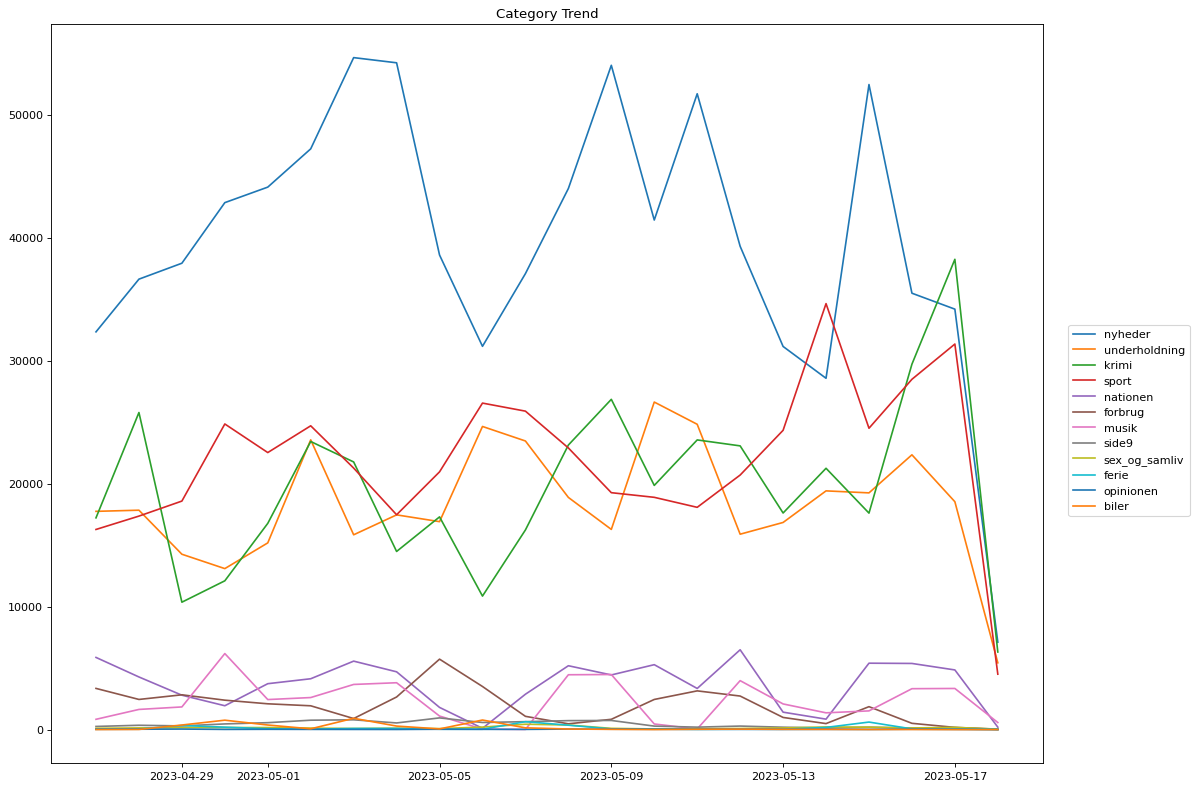

In [142]:
plt.figure(figsize=(16, 12), dpi=80)
dates = history_train_1.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].unique()
dict_2 = dict_1.copy()
for el in dict_1:
    if len(dict_1[el]) == len(dates):
        plt.plot(dates,dict_1[el], label=el)
        del dict_2[el]
    
plt.legend(bbox_to_anchor=(1.02, 0.6))
plt.title("Category Trend")
plt.savefig("Category Trend")
plt.show()

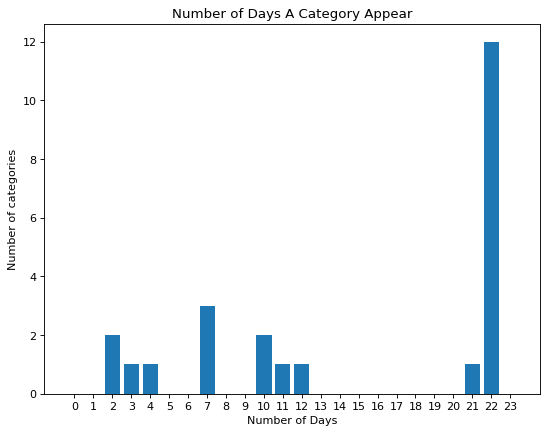

In [148]:
plt.figure(figsize=(8, 6), dpi=80)
length = [0] * 24
days = np.arange(0,24)
for el in dict_1:
    length[len(dict_1[el])] += 1
plt.title('Number of Days A Category Appear')
plt.ylabel('Number of categories')
plt.xlabel('Number of Days')
plt.bar(days, length, tick_label=days)
plt.savefig('Number of Days A Category Appear')

In [101]:
del dict_1
del dict_2
gc.collect()

0

In [53]:
articles_1 = articles.select(['article_id','category_str'])
history_t = history_train.explode(columns=['article_id_fixed','impression_time_fixed']).select(['article_id_fixed','impression_time_fixed']).rename({'article_id_fixed':'article_id'})
history_train_1 = history_t.join(articles_1, on='article_id').select(['impression_time_fixed','category_str'])
history_train_1 = history_train_1.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','category_str']).count().sort(['count','impression_time_fixed'],descending=True)

print("Days : {}".format(history_train_1.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].n_unique()))
for date in history_train_1.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].unique():
    list = history_train_1.filter(pl.col('impression_time_fixed')== date).limit(5).select(['category_str','count']).to_numpy()
    print("Date {}".format(date))
    print(list)

del articles_1
del history_train_1
gc.collect()

/tmp/ipykernel_221/567602408.py:4: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  history_train_1 = history_train_1.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','category_str']).count().sort(['count','impression_time_fixed'],descending=True)


Days : 22
Date 2023-04-27
[['nyheder' 32333]
 ['underholdning' 17743]
 ['krimi' 17215]
 ['sport' 16271]
 ['nationen' 5869]]
Date 2023-04-28
[['nyheder' 36617]
 ['krimi' 25776]
 ['underholdning' 17837]
 ['sport' 17357]
 ['nationen' 4281]]
Date 2023-04-29
[['nyheder' 37912]
 ['sport' 18578]
 ['underholdning' 14258]
 ['krimi' 10359]
 ['forbrug' 2831]]
Date 2023-04-30
[['nyheder' 42837]
 ['sport' 24845]
 ['underholdning' 13089]
 ['krimi' 12097]
 ['musik' 6183]]
Date 2023-05-01
[['nyheder' 44098]
 ['sport' 22522]
 ['krimi' 16767]
 ['underholdning' 15180]
 ['nationen' 3734]]
Date 2023-05-02
[['nyheder' 47209]
 ['sport' 24697]
 ['underholdning' 23554]
 ['krimi' 23421]
 ['nationen' 4136]]
Date 2023-05-03
[['nyheder' 54624]
 ['krimi' 21758]
 ['sport' 21260]
 ['underholdning' 15838]
 ['nationen' 5568]]
Date 2023-05-04
[['nyheder' 54203]
 ['sport' 17466]
 ['underholdning' 17457]
 ['krimi' 14483]
 ['nationen' 4700]]
Date 2023-05-05
[['nyheder' 38579]
 ['sport' 20954]
 ['krimi' 17293]
 ['underholdn

491

# **Sub-Category Trend**

In [129]:
articles_2 = articles.select(['article_id','subcategory']).explode(columns=['subcategory'])
history_train_2 = history_t.join(articles_2, on='article_id').select(['impression_time_fixed','subcategory'])
history_train_2 = history_train_2.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','subcategory']).count().sort(['count','impression_time_fixed'],descending=True)

dict_1 = {}
print("Days : {}".format(history_train_2.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].n_unique()))
for date in history_train_2.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].unique():
    list = history_train_2.filter(pl.col('impression_time_fixed')== date).select(['subcategory','count']).to_numpy()
    for el in list:
        if np.isnan(el[0]):
            el[0] = '0'
        if el[0] not in dict_1.keys():
            dict_1[el[0]] = [el[1]]
        else:
            val = dict_1.get(el[0])
            val.append(el[1])
            dict_1[el[0]] = val

Days : 22


/tmp/ipykernel_33/1919343645.py:3: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  history_train_2 = history_train_2.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','subcategory']).count().sort(['count','impression_time_fixed'],descending=True)


In [ ]:
plt.figure(figsize=(20, 15), dpi=80)
dates = history_train_1.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].unique()
dict_2 = dict_1.copy()
for el in dict_1:
    if len(dict_1[el]) == len(dates):
        plt.plot(dates,dict_1[el], label=el)
        del dict_2[el]
    
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title('SubCategory Trend')
plt.savefig('SubCategory Trend')
plt.show()

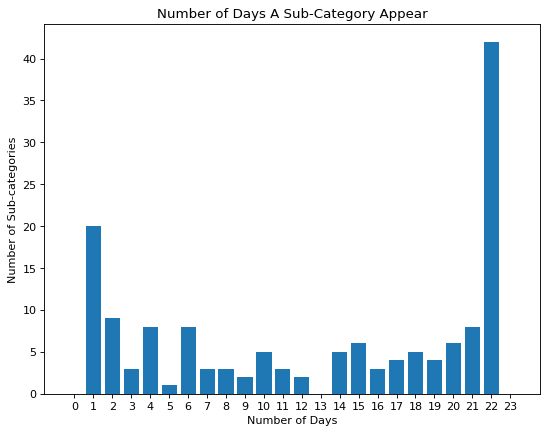

In [135]:
plt.figure(figsize=(8, 6), dpi=80)
length = [0] * 24
days = np.arange(0,24)
for el in dict_1:
    length[len(dict_1[el])] += 1
plt.title('Number of Days A Sub-Category Appear')
plt.ylabel('Number of Sub-categories')
plt.xlabel('Number of Days')
plt.bar(days, length, tick_label=days)
plt.savefig('Number of Days A Sub-Category Appear')

In [57]:
articles_2 = articles.select(['article_id','subcategory']).explode(columns=['subcategory'])
history_train_2 = history_t.join(articles_2, on='article_id').select(['impression_time_fixed','subcategory'])
history_train_2 = history_train_2.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','subcategory']).count().sort(['count','impression_time_fixed'],descending=True)

print("Days : {}".format(history_train_2.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].n_unique()))
for date in history_train_2.with_columns(pl.col('impression_time_fixed').dt.date())['impression_time_fixed'].unique():
    list = history_train_2.filter(pl.col('impression_time_fixed')== date).limit(8).select(['subcategory','count']).to_numpy()
    print("Date {}".format(date))
    print(list)

del articles_2
del history_train_2
del history_t
gc.collect()

/tmp/ipykernel_33/405331914.py:3: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  history_train_2 = history_train_2.with_columns(pl.col('impression_time_fixed').dt.date()).group_by(['impression_time_fixed','subcategory']).count().sort(['count','impression_time_fixed'],descending=True)


Days : 22
Date 2023-04-27
[[   nan 24776.]
 [  133. 18519.]
 [  196.  9011.]
 [  130.  6973.]
 [  433.  5793.]
 [  199.  5555.]
 [  327.  5369.]
 [  425.  3701.]]
Date 2023-04-28
[[   nan 30996.]
 [  133. 23080.]
 [  196.  6630.]
 [  433.  6186.]
 [  130.  5340.]
 [  123.  5218.]
 [  425.  4718.]
 [  337.  4612.]]
Date 2023-04-29
[[  133. 26018.]
 [   nan 18230.]
 [  196.  7720.]
 [  127.  5110.]
 [  327.  5044.]
 [  432.  4056.]
 [  227.  4043.]
 [  433.  3409.]]
Date 2023-04-30
[[  133. 25179.]
 [   nan 16889.]
 [  196. 13116.]
 [  199.  7542.]
 [  130.  6460.]
 [  208.  6414.]
 [  131.  5273.]
 [  337.  5150.]]
Date 2023-05-01
[[   nan 23283.]
 [  133. 14727.]
 [  327. 10781.]
 [  127.  8676.]
 [  130.  8290.]
 [  123.  7839.]
 [  196.  7038.]
 [  432.  5682.]]
Date 2023-05-02
[[   nan 30703.]
 [  133. 26464.]
 [  196. 14511.]
 [  227.  9541.]
 [  123.  8620.]
 [  433.  7165.]
 [  327.  6008.]
 [  130.  5132.]]
Date 2023-05-03
[[   nan 33069.]
 [  133. 24140.]
 [  196. 14014.]
 [  2

42765